# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):   
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 
        #Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | richards bay
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | oranjemund
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | la mira
Processing Record 10 of Set 1 | ha'il
Processing Record 11 of Set 1 | yuzhno-kurilsk
Processing Record 12 of Set 1 | sao jose da coroa grande
Processing Record 13 of Set 1 | gilleleje
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | woolgoolga
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 |

Processing Record 36 of Set 4 | walvis bay
Processing Record 37 of Set 4 | cheongsong gun
Processing Record 38 of Set 4 | guixi
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | ash shafa
City not found. Skipping...
Processing Record 41 of Set 4 | north bend
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | hoxtolgay
City not found. Skipping...
Processing Record 44 of Set 4 | nova sintra
Processing Record 45 of Set 4 | constantia
Processing Record 46 of Set 4 | buka
Processing Record 47 of Set 4 | keetmanshoop
Processing Record 48 of Set 4 | dravograd
Processing Record 49 of Set 4 | weihai
Processing Record 0 of Set 5 | tura
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | lerwick
Processing Record 3 of Set 5 | mahina
Processing Record 4 of Set 5 | tarawa
Processing Record 5 of Set 5 | traralgon
Processing Record 6 of Set 5 | ojinaga
Processing Record 7 of Set 5 | norfolk
Processing Record 8 of Set 5 | zhanaoze

Processing Record 28 of Set 8 | espargos
City not found. Skipping...
Processing Record 29 of Set 8 | muntok
Processing Record 30 of Set 8 | bayevo
Processing Record 31 of Set 8 | south hedland
Processing Record 32 of Set 8 | tralee
Processing Record 33 of Set 8 | garhi khairo
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | brokopondo
Processing Record 36 of Set 8 | kayangel
Processing Record 37 of Set 8 | kongolo
Processing Record 38 of Set 8 | uetze
Processing Record 39 of Set 8 | paka
Processing Record 40 of Set 8 | qaqortoq
Processing Record 41 of Set 8 | am djarass
City not found. Skipping...
Processing Record 42 of Set 8 | bykhaw
Processing Record 43 of Set 8 | awjilah
Processing Record 44 of Set 8 | calama
Processing Record 45 of Set 8 | la paz
Processing Record 46 of Set 8 | union city
Processing Record 47 of Set 8 | tarko-sale
Processing Record 48 of Set 8 | mogok
Processing Record 49 of Set 8 | saratamata
City not found. Skipping...
Processing Record 0

Processing Record 17 of Set 12 | yung shue wan
Processing Record 18 of Set 12 | bu'aale
Processing Record 19 of Set 12 | portland
Processing Record 20 of Set 12 | kargasok
Processing Record 21 of Set 12 | kiboga
Processing Record 22 of Set 12 | papao
Processing Record 23 of Set 12 | kindu
Processing Record 24 of Set 12 | anabar
City not found. Skipping...
Processing Record 25 of Set 12 | bikenibeu village
Processing Record 26 of Set 12 | chicoana
Processing Record 27 of Set 12 | wanning
Processing Record 28 of Set 12 | aginskoye
Processing Record 29 of Set 12 | hopelchen
Processing Record 30 of Set 12 | cooper's town
Processing Record 31 of Set 12 | al ghayzah
Processing Record 32 of Set 12 | melekeok village
Processing Record 33 of Set 12 | tadine
Processing Record 34 of Set 12 | phichit
Processing Record 35 of Set 12 | chibougamau
Processing Record 36 of Set 12 | kirakira
Processing Record 37 of Set 12 | farsan
Processing Record 38 of Set 12 | extrema
Processing Record 39 of Set 12 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
    

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,25.03,69,75,6.17,CK,1698870761
1,Richards Bay,-28.7830,32.0377,16.20,78,76,1.02,ZA,1698870565
2,Albany,42.6001,-73.9662,7.23,57,50,0.89,US,1698870575
3,Edinburgh Of The Seven Seas,-37.0676,-12.3116,14.67,91,51,4.05,SH,1698870761
4,Oranjemund,-28.5500,16.4333,19.40,69,50,3.90,NA,1698870761
...,...,...,...,...,...,...,...,...,...
555,Chibougamau,49.9168,-74.3659,-5.21,74,100,5.14,CA,1698870968
556,Kirakira,-10.4544,161.9205,27.35,83,100,3.88,SB,1698870968
557,Farsan,32.2569,50.5610,10.02,57,99,0.11,IR,1698870968
558,Extrema,-22.8547,-46.3183,18.17,92,89,2.94,BR,1698870969


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,25.03,69,75,6.17,CK,1698870761
1,Richards Bay,-28.7830,32.0377,16.20,78,76,1.02,ZA,1698870565
2,Albany,42.6001,-73.9662,7.23,57,50,0.89,US,1698870575
3,Edinburgh Of The Seven Seas,-37.0676,-12.3116,14.67,91,51,4.05,SH,1698870761
4,Oranjemund,-28.5500,16.4333,19.40,69,50,3.90,NA,1698870761


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

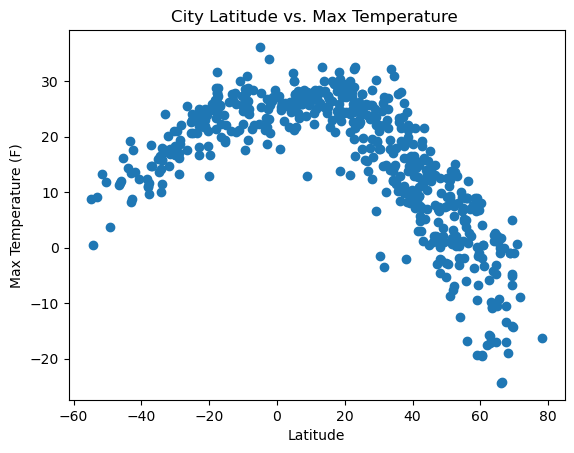

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Save the figure
plt.savefig("output_data/`City Latitude vs. Max Temperature`.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

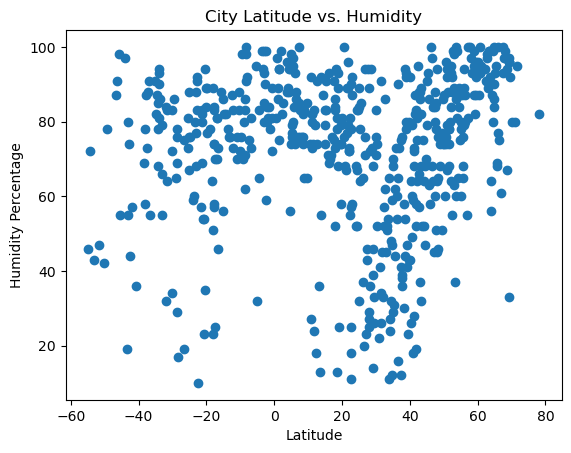

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
# Save the figure
plt.savefig("output_data/`City Latitude vs. Humidity`.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

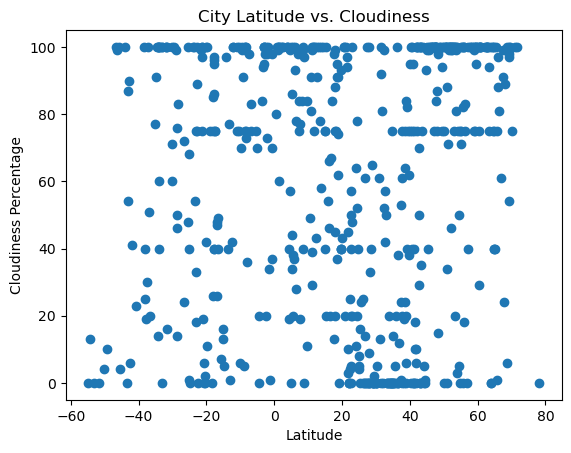

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Percentage")
# Save the figure
plt.savefig("output_data/'City Latitude vs. Cloudiness'.png") 
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

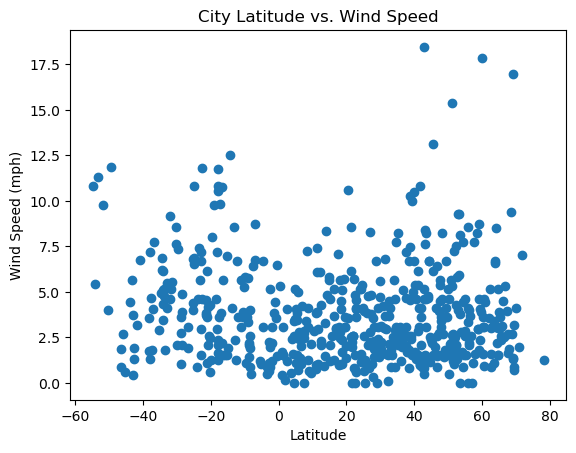

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Save the figure
plt.savefig("output_data/`City Latitude vs. Wind Speed`.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.342242933852943


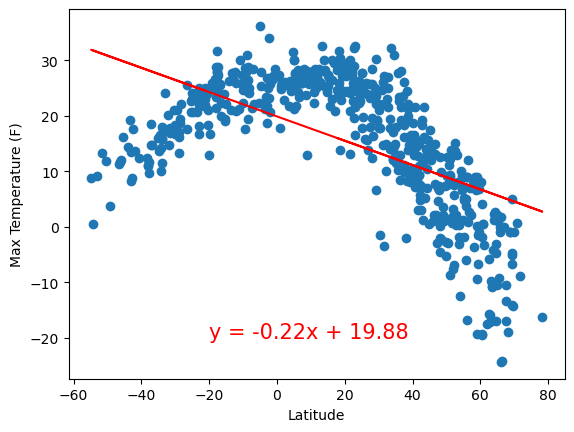

In [12]:
# Define a function to create Linear Regression plots
x_values_lat = city_data_df['Lat']
y_values_temp = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_temp)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat,y_values_temp)
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Albany,42.6001,-73.9662,7.23,57,50,0.89,US,1698870575
7,Tiksi,71.6872,128.8694,-8.94,95,100,7.05,RU,1698870762
8,La Mira,18.0350,-102.3266,29.22,73,88,2.78,MX,1698870762
9,Ha'Il,27.5219,41.6907,18.01,94,0,1.03,SA,1698870762
10,Yuzhno-Kurilsk,44.0306,145.8556,14.10,75,100,4.80,RU,1698870763


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,25.03,69,75,6.17,CK,1698870761
1,Richards Bay,-28.7830,32.0377,16.20,78,76,1.02,ZA,1698870565
3,Edinburgh Of The Seven Seas,-37.0676,-12.3116,14.67,91,51,4.05,SH,1698870761
4,Oranjemund,-28.5500,16.4333,19.40,69,50,3.90,NA,1698870761
5,Grytviken,-54.2811,-36.5092,0.57,72,13,5.46,GS,1698870762


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7264424537272292


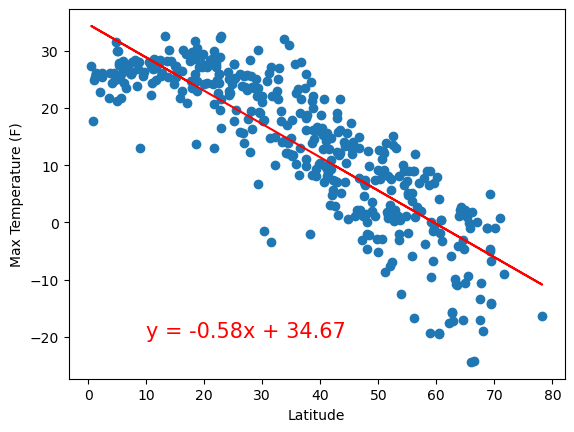

In [15]:
# Linear regression on Northern Hemisphere
x_values_lat_N = northern_hemi_df['Lat']
y_values_temp = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_N, y_values_temp)
regress_values = x_values_lat_N * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_N,y_values_temp)
plt.plot(x_values_lat_N,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6354302419707035


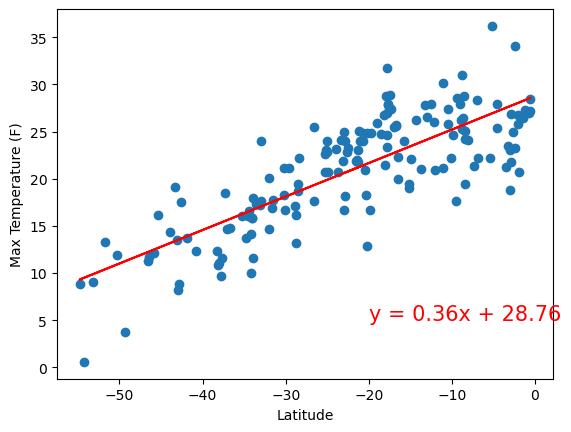

In [16]:
# Linear regression on Southern Hemisphere
x_values_lat_S = southern_hemi_df['Lat']
y_values_temp = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_S, y_values_temp)
regress_values = x_values_lat_S * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_S,y_values_temp)
plt.plot(x_values_lat_S,regress_values,"r-")
plt.annotate(line_eq,(-20,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Based on our data, the closer the city is to the latitude of 0, aka getting nearer to the Earth equator, the higher the maximum tempurature the city will experience.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.022841766334878298


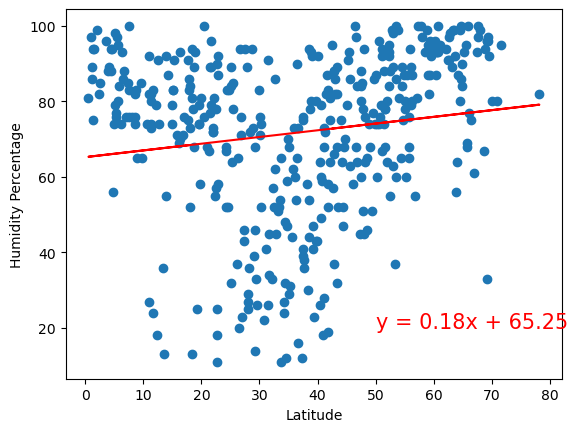

In [23]:
# Northern Hemisphere
x_values_lat_N = northern_hemi_df['Lat']
y_values_hum = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_N, y_values_hum)
regress_values = x_values_lat_N * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_N,y_values_hum)
plt.plot(x_values_lat_N,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity Percentage")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0638213559377859


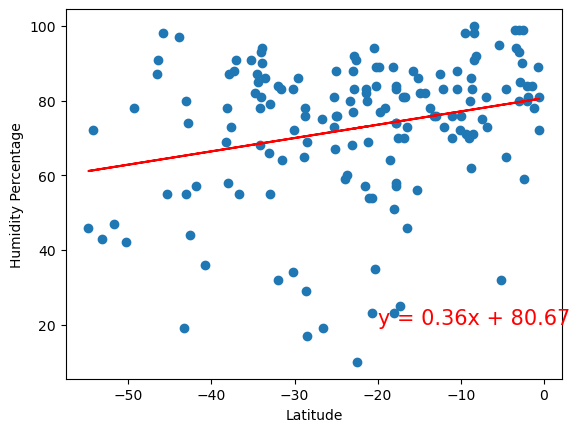

In [24]:
# Southern Hemisphere
x_values_lat_S = southern_hemi_df['Lat']
y_values_hum = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_S, y_values_hum)
regress_values = x_values_lat_S * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_S,y_values_hum)
plt.plot(x_values_lat_S,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity Percentage")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Based on our data, the closer the city is to the latitude of 0, aka getting nearer to the Earth equator, the higher the humidity in the air will be for the city. However with r-square value quite low, indicate there are potentially other factors that affects the humidity other than just the latitude of the city.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02839664185940022


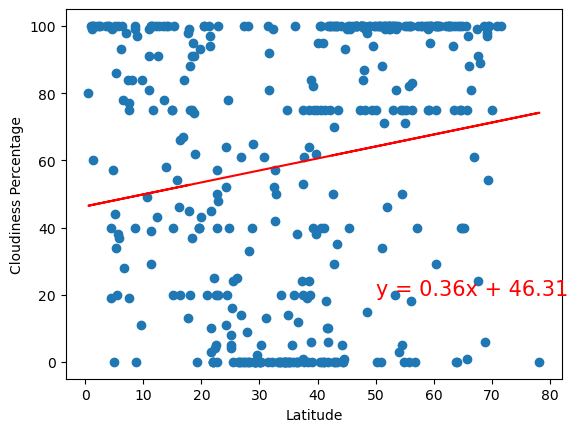

In [25]:
# Northern Hemisphere
x_values_lat_N = northern_hemi_df['Lat']
y_values_cloud = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_N, y_values_cloud)
regress_values = x_values_lat_N * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_N,y_values_cloud)
plt.plot(x_values_lat_N,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness Percentage")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03586672000219727


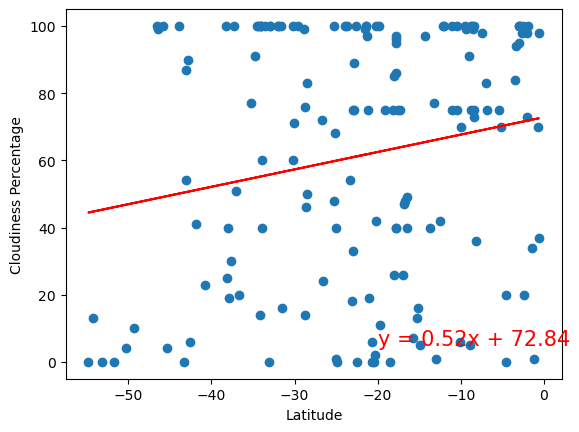

In [20]:
# Southern Hemisphere
x_values_lat_S = southern_hemi_df['Lat']
y_values_cloud = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_S, y_values_cloud)
regress_values = x_values_lat_S * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_S,y_values_cloud)
plt.plot(x_values_lat_S,regress_values,"r-")
plt.annotate(line_eq,(-20,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness Percentage")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Based on our data, the latitude seem to have little to no effects on the cloudiness the city will experience. With r-square value quite low, indicate there are potentially other factors that affects the cloudiness other than just the latitude of the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.020852881984277025


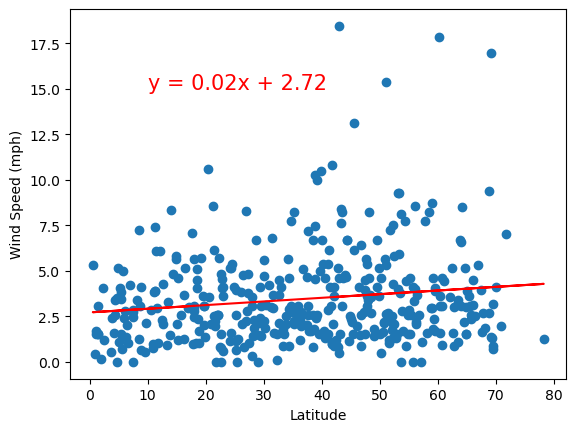

In [26]:
# Northern Hemisphere
x_values_lat_N = northern_hemi_df['Lat']
y_values_wind = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_N, y_values_wind)
regress_values = x_values_lat_N * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_N,y_values_wind)
plt.plot(x_values_lat_N,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.044897979076009446


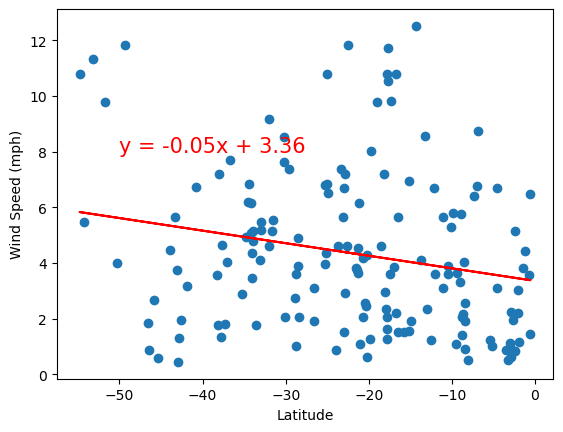

In [27]:
# Southern Hemisphere
x_values_lat_S = southern_hemi_df['Lat']
y_values_wind = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat_S, y_values_wind)
regress_values = x_values_lat_S * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_lat_S,y_values_wind)
plt.plot(x_values_lat_S,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Based on our data, the latitude seem to have little to no effects on the wind speed through the city. With r-square value quite low, indicate there are potentially other factors that affects the wind speed through the city other than just the latitude of the city.